## В данном проекте вы поработаете с gff файлом, который описывает геном мухи.

## Задачи:
**1. Выделите из колонки attributes значение атрибута Parent. Т.е. если там записано Parent=x, то нам нужен x**

**2. Выясните, какое из этих значений является самым частым**

**3. Постройте распределение встречаемости значений в столбце type**

In [1]:
import pandas as pd

In [2]:
# Считаем файл
gff = pd.read_csv(r'D:\data_analysis\projects\gff.tsv', sep='\t')
gff.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1


In [3]:
# Посмотрим на размерность данных
gff.shape

(512, 9)

#### 1) Выделим из колонки attributes значение атрибута Parent и запишем в отдельную колонку.

In [4]:
gff['parent'] = gff['attributes'].str.extract(r'Parent=([\w\.]+)')
gff.head()

,seq_id,source,type,start,end,score,strand,phase,attributes,parent
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1,XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...,XM_001475631.1
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...,XM_001475631.1
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1,XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1,XM_001475631.1


#### 2) Выясним какое из этих значений является самым частым.

In [5]:
gff['parent'].value_counts()

XM_001475631.1    479
NC_000083.5        33
Name: parent, dtype: int64

#### 3) Построим распределение встречаемости значений по столбцу type.

<AxesSubplot:>

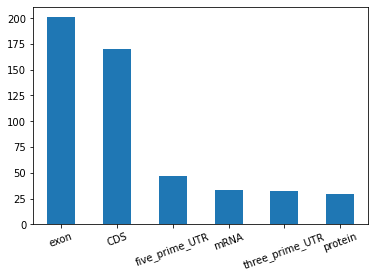

In [6]:
gff['type'].value_counts().plot(kind='bar', rot=20)